In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Split Data into Train, Validate, and Test Sets

In [2]:
df = pd.read_csv("CleanedNormalizedData.csv")
df = df.drop(columns=['Unnamed: 0',
                      'weather_main',
                      'weather_description',
                      'date_time',
                      'date'])

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,weekend,year,MIST,THUNDERSTORM,SNOW,RAIN,SQUALL,HAZE,FOG,DRIZZLE,CLEAR,CLOUDS,SMOKE
0,0,0.685513,1.000000,0.0,68,315,0.086957,8,4,2013,0,0,0,1,0,0,0,0,0,0,0
1,0,0.786293,0.799029,0.0,76,4802,0.478261,6,2,2013,0,0,0,1,0,0,0,0,0,0,0
2,0,0.814637,0.570735,0.0,0,4913,0.739130,8,3,2016,0,0,0,1,0,0,0,0,0,0,0
3,0,0.316587,0.515909,0.0,64,1190,1.000000,12,5,2013,0,0,0,1,0,0,0,0,0,0,0
4,0,0.316587,0.515909,0.0,64,1190,1.000000,12,5,2013,0,0,1,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,weekend,year,MIST,THUNDERSTORM,SNOW,RAIN,SQUALL,HAZE,FOG,DRIZZLE,CLEAR,CLOUDS,SMOKE
count,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000,48176.000000
mean,0.019117,0.567980,0.002344,0.000436,49.375166,3259.973887,0.495606,6.506248,3.987172,2015.512351,0.123485,0.021442,0.059677,0.117714,0.000083,0.028230,0.018931,0.037778,0.277607,0.314638,0.000415
std,0.136939,0.190607,0.018042,0.016020,39.013008,1986.847829,0.301760,3.399930,1.998869,1.893482,0.328996,0.144855,0.236890,0.322273,0.009112,0.165631,0.136281,0.190661,0.447823,0.464376,0.020371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.431764,0.000000,0.000000,1.000000,1194.000000,0.217391,4.000000,2.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.585933,0.000000,0.000000,64.000000,3380.000000,0.478261,7.000000,4.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.726110,0.000000,0.000000,90.000000,4933.000000,0.739130,9.000000,6.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,100.000000,7280.000000,1.000000,12.000000,7.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#split into train, validate, and testing datasets

df_train = df.loc[df['year'] <= 2015].drop(columns=['year']) #to train model
df_validate = df.loc[df['year'] == 2016].drop(columns=['year']) #for tuning hyperparams
df_test = df.loc[df['year'] >= 2017].drop(columns=['year']) #for final testing at end

## Split Sets into Features and Labels
Features = weather/time information, Labels = traffic_volume

In [6]:
df_test.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,weekend,MIST,THUNDERSTORM,SNOW,RAIN,SQUALL,HAZE,FOG,DRIZZLE,CLEAR,CLOUDS,SMOKE
82,0,0.712208,0.190545,0.0,90,2957,0.826087,9,5,0,0,0,1,0,0,0,0,0,0,0
83,0,0.712208,0.190545,0.0,90,2957,0.826087,9,5,0,1,0,0,0,0,0,0,0,0,0
84,0,0.712208,0.190545,0.0,90,2957,0.826087,9,5,1,0,0,0,0,0,0,0,0,0,0
85,0,0.712208,0.190545,0.0,90,2957,0.826087,9,5,0,0,0,0,0,1,0,0,0,0,0
100,0,0.712507,0.172928,0.0,90,3898,0.782609,9,5,0,0,0,1,0,0,0,0,0,0,0


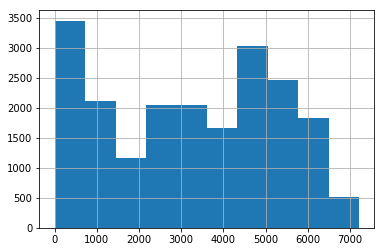

In [81]:
df_train.traffic_volume.hist()

In [7]:
x_train = df_train.drop(columns=['traffic_volume']).values
y_train = df_train.traffic_volume.values

x_valid = df_validate.drop(columns=['traffic_volume']).values
y_valid = df_validate.traffic_volume.values

x_test = df_test.drop(columns=['traffic_volume']).values
y_test = df_test.traffic_volume.values

## Build the MLP Model

In [75]:
def build_reg(x, y, n_perc,a_func):
    
    reg = MLPRegressor(hidden_layer_sizes=(n_perc,n_perc,n_perc),
                       activation=a_func,
                       solver='adam',
                       batch_size='auto',
                       learning_rate='constant',
                       learning_rate_init=0.01,
                       max_iter=1000,
                       shuffle=True)
    
    reg = reg.fit(x, y)
    
    return reg

In [51]:
model = build_reg(x_train,y_train,30,"relu",0.01)

In [52]:
mean_absolute_error(model.predict(x_valid),y_valid)

511.3008453391658

## Tuning: Run Grid-Search on Hyperparameters

In [73]:
#defining my own grid search due to known bugs with sklearn's "GridSearchCV"

def gridsearch_hyperparams(x_tr,y_tr, #training data
                           x_val,y_val, #validation data
                           perceptrons,
                           activations):
    
    scores = np.empty([len(perceptrons),len(activations)])
    mse_best = None
    
    for P in range(len(perceptrons)):
        for A in range(len(activations)):
                
                #train model
                model = build_reg(x_tr,y_tr,
                                  perceptrons[P],
                                  activations[A])
                
                #compute loss, store in scores
                y_pr = model.predict(x_val)
                mse = mean_absolute_error(y_pr,y_val)
                scores[P][A] = mse
                
                #update best model
                if mse_best==None:
                    mse_best = mse
                    model_best = model
                elif mse < mse_best:
                    mse_best = mse
                    model_best = model
            
    return scores, model_best

In [76]:
results, model = gridsearch_hyperparams(x_train,y_train,x_valid,y_valid,
                                       [10,20,30,40,50,60,70,80,90,100],
                                       ["logistic","relu","tanh"])

In [77]:
y_pred = model.predict(x_valid)
mean_absolute_error(y_pred,y_valid)

351.2968250243225

Note, DARK=good, since these values are lower (lower error)

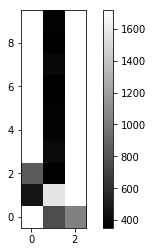

In [78]:
plt.imshow(results, origin="lower", cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [85]:
np.where(results == np.amin(results))

(array([6]), array([1]))

Therefore, best hyperparameters were 
- 70 perceptrons
- ReLU activation functions 

## Test on Holdout Data

In [89]:
# Test on Holdout
y_predictions = model.predict(x_test)
print("Mean Absolute Error:",mean_absolute_error(y_predictions,y_test))
print("Mean Squared Error:",mean_squared_error(y_predictions,y_test))

Mean Absolute Error: 318.4166727396268
Mean Squared Error: 222179.0693168229


In [97]:
# find score of a classifier
# compares predicted traffic volume to real traffic volume, if within 5% of real, it is deemed correct
# arguments:
#   pred = predictions
#   ytest = real values
#   error = percent allowable error
def correct_within_error(pred, ytest, error):

    count = 0
    for i in range(0, len(y_pred)):
        delta = ytest[i] * error
        if ytest[i] - delta < pred[i] < ytest[i] + delta:
            count = count + 1

    return count / len(y_pred)

In [114]:
#10 percent
correct_to_10perc = correct_within_error(y_predictions,y_test,.1)
print("Predictions correct within 10% margin:",100*correct_to_10perc,"%")
#15 percent
correct_to_15perc = correct_within_error(y_predictions,y_test,.15)
print("Predictions correct within 15% margin:",100*correct_to_15perc,"%")
#20 percent
correct_to_20perc = correct_within_error(y_predictions,y_test,.2)
print("Predictions correct within 20% margin:",100*correct_to_20perc,"%")

Predictions correct within 10% margin: 57.6836218948274 %
Predictions correct within 15% margin: 73.2874502634692 %
Predictions correct within 20% margin: 82.06258737498656 %


Text(0.5, 1.0, 'Predictions vs Actual Values (Line shows 0 error)')

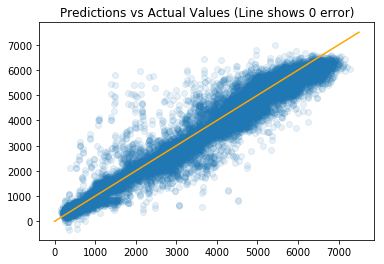

In [116]:
plt.plot(y_test,y_predictions,'o',alpha=0.1)
plt.plot([0,7500],[0,7500],color="orange")
plt.title("Predictions vs Actual Values (Line shows 0 error)")

## Save Results in csv

In [117]:
df_test['predictions'] = y_predictions

In [118]:
df_test.to_csv("ResultsFromNeuralNet.csv")